<a href="https://colab.research.google.com/github/sinaabbasi1/applied-data-science/blob/main/Assignments/Assignment%2011/ADS_Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset: Fashion-MNIST

1. Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

2. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

3. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms.

4. It shares the same image size and structure of training and testing splits.

The 10 classes and some sample images are shown below. Our goal would be to develop convolutional neural networks in order to classify each image.


![alt text](https://www.researchgate.net/profile/Saeed-Reza-Kheradpisheh/publication/342801790/figure/fig2/AS:911232181735425@1594266090934/Sample-images-from-Fashion-MNIST-dataset.png)



The classes are:

<table>
<thead>
<tr>
<th style="text-align: center;">Label</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align: center;">0</td>
<td>T-shirt/top</td>
</tr>
<tr>
<td style="text-align: center;">1</td>
<td>Trouser</td>
</tr>
<tr>
<td style="text-align: center;">2</td>
<td>Pullover</td>
</tr>
<tr>
<td style="text-align: center;">3</td>
<td>Dress</td>
</tr>
<tr>
<td style="text-align: center;">4</td>
<td>Coat</td>
</tr>
<tr>
<td style="text-align: center;">5</td>
<td>Sandal</td>
</tr>
<tr>
<td style="text-align: center;">6</td>
<td>Shirt</td>
</tr>
<tr>
<td style="text-align: center;">7</td>
<td>Sneaker</td>
</tr>
<tr>
<td style="text-align: center;">8</td>
<td>Bag</td>
</tr>
<tr>
<td style="text-align: center;">9</td>
<td>Ankle boot</td>
</tr>
</tbody>
</table>

# Installing and Importing Libraries

For the examples we will work on in this notebook, we first need to upgrade the scikit-learn libraries.

Please note that **we will need to restart runtime** after executing the following block.

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.1


In [ ]:
# First, let's upgrade scikit-learn package in colab
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
import sklearn
print(sklearn.__version__)

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.5 MB/s eta 0:00:00


1.0.2


In [ ]:
# Disable warnings about max_itr not reached etc.!
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Now let's import the libraries we will need later on.

In [ ]:
# Importing necessary libraries
import pandas as pd
import io
import os
import numpy as np
import copy
import pdb
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from keras.models import Sequential
from keras import callbacks
import tensorflow as tf
from sklearn.metrics import f1_score
from tensorflow.keras import initializers
from keras.regularizers import l2,l1,l1_l2
import math
import itertools

%matplotlib inline
sns.set(color_codes=True)

# Loading the Dataset
Fashion-MNIST dataset can be loaded directly from Keras.

In [ ]:
import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train = np.reshape(y_train, (60000, 1))
y_test = np.reshape(y_test, (10000, 1))

X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Let's take a look at a few images from the train and test sets:

In [ ]:
# from skimage.transform import resize
# xx = resize(X_train, (60000, 32, 32, 1))

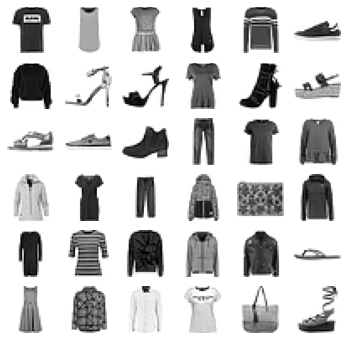

In [ ]:
fig, ax = plt.subplots(nrows=6, ncols=6, figsize=(6,6))
itr = 0
for i in range(0,6):
  for j in range(0,6):
    itr += 1

    # convert to unsigned integers
    image = X_train[itr,:,:,:]

    # plot image
    ax[i,j].imshow(image[:,:,0], cmap='gray_r')
    ax[i,j].axis('off')

# Getting Some Insights from Our Data
It is now time to do some EDA! We just play with different data columns to get more sense about our data.

First, let's check the distribution of classes in the training set:

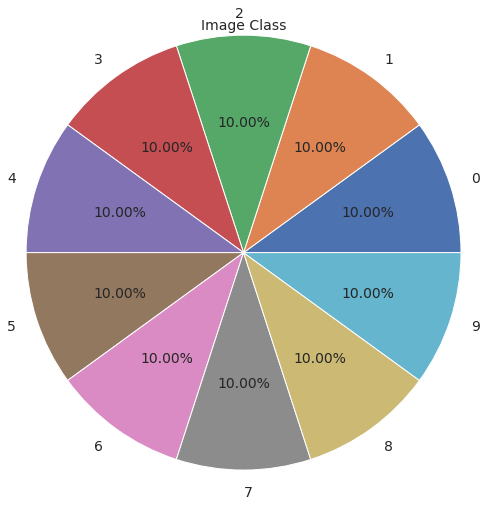

In [ ]:
# Now, let's query the corresponding slice from our main dataframe
y_df = pd.DataFrame(y_train)
selected_labels = range(0,10)
y_df.value_counts().plot(
    kind='pie', figsize=(16,8), autopct='%1.2f%%', ylabel='', radius=1.25, labels=selected_labels, fontsize=14)

# Now let's setup the labels, titles and format y axis as percentages
plt.title("Image Class",fontsize=14)
#plt.legend(selected_labels,loc='lower right',fontsize=14)
plt.show()

As we can see from the above chart, data is fully balanced!

# Data Cleaning
Fashion-MNIST dataset can be considered "clean" for our purposes. So we move to the next step.

### Normalization/Standardization
Our next step would be to "normalize" all the columns so that they have a "similar" range. Since we are dealing with images, our feature "columns" are image pixels. So what we need to do is ensure our pixels have a similar range.

As before, we can follow different scaling approaches, e.g. Standard Scaling or MinMax scaling. For now, we proceed with sort-of a MinMax scaling, i.e. dividing all pixels by 255 (Later, we see how we can do StandardScaling (i.e. whitening images) using one of Keras's handy modules)

In [ ]:
X_train = X_train/255.
X_test = X_test/255.

# Pareparing Train and Test Sets
Since we are working with Fashion-MNIST dataset, the data is already broken into train and test sets. Nice! :)

Here, since we have ten classes, we perform one-hot-encoding on the target variable too.

In [ ]:
# First, let's separate the target column, price
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
enc = LabelBinarizer()
enc.fit(y_train)

y_train_enc = enc.transform(y_train)

In [ ]:
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

In [ ]:
y_train_enc

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_test_enc = enc.transform(y_test)

# Convolutional Networks With Keras
First let's define our early stopping.

In [ ]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,          # minimium amount of change to be considered an improvement
    patience=5,              # number of epochs to wait before deciding there is no significant improvement in training
    restore_best_weights=True,
)

### Some Handy Functions
First, let's define a wrapper functions to create models based on given specs.

We start with the function we use to plot the loss or accuracy (precision/recall) of the model during training. The inputs are:


*   history: this is the output history of the keras fit() method
*   plot_type: if it is "loss", the training/validation loss will be plotted. Otherwise, the accuracy graph is returned.



In [ ]:
#@title
def plot_history(history,plot_type: str):
  hist_df = pd.DataFrame(history.history)
  plt.figure(figsize=(20,8))
  colors = []
  columns_to_plot = []
  labels = []
  for col_name in hist_df.columns:

    # Define colors
    if 'val' in col_name:
      validation = True
      color_base = 'r'
      label_base = 'Validation'
    else:
      validation = False
      color_base = 'b'
      label_base = 'Training'

    if plot_type == 'loss':
      if 'loss' in col_name:
        labels.append(label_base)
        columns_to_plot.append(col_name)
        colors.append(color_base)
    else:
      if 'loss' in col_name:
        continue
      if 'recall' in col_name:
        color = color_base + '--'
        label = label_base + 'Recall'
      else:
        color = color_base
        label = label_base + 'Precision'

      labels.append(label)
      columns_to_plot.append(col_name)
      colors.append(color)



  for itr in range(0,len(columns_to_plot)):
    plt.plot(hist_df.loc[:, [columns_to_plot[itr]]], colors[itr], label=labels[itr],lw=4)

  plt.ylabel(plot_type)
  plt.xlabel('Epochs')
  plt.legend(loc="best")

  plt.show()

Next, we proceed with a function to create a multi-layered feedforward neural network. The way it works is that we specify the following inputs:

*   hidden_layers: specifies the hidden layers and the structure of the network, with the following conventions
    * `Conv2D_AxB_C_D`: a convolutional layer, with the receptive field (kernel size) of size `AxB`, no. filters of `C` and stride of `D`.
    * `MaxPooling2D_AxB_D`: a max pooling layer, with the receptive field (filter) of size `AxB` and stride of `D`
    * `AveragePooling2D_AxB_D`: an average pooling layer, with the receptive field (filter) of size `AxB` and stride of `D`
    * `Flatten`: the flatten layer,
    * `Dense_N`: a dense layer with `N` neurons.
*   input_size: the number of neurons in the input layer. It is equal to `X_train.shape[1]`
*   activation_func: it is a string specifying the type of the activation function.
*   l1_reg: a real number, which specifies the l1-regualirization coefficient in each layer (the higher it is, the more severe the regularization will be).
*   l2_reg: a real number, which specifies the l2-regualirization coefficient in each layer (the higher it is, the more severe the regularization will be).
*   learning_rate: a real number, specifying the learning rate in the gradient descent algorithm
*   learning_rate_decay: a real number, specifying the decay in the learning rate after a few iterations
*   dropout_rate: the rate at which neurons are "dropped-out" during training. If this value is 0, it means we won't have any dropout
*   weight_initializer: name of the weight initialization technique used to setup the weights when the algorithm starts.
    
Once given these inputs, the function creates the model according to our specs, compile it and return it as the output.

In [ ]:
X_train.shape[1:]

(28, 28, 1)

In [ ]:
from keras.layers import Dense, Input, Dropout, Conv2D, AveragePooling2D, MaxPooling2D, Flatten

In [ ]:
def create_model(hidden_layers: list=['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2', 'Flatten','Dense_30'],
                 input_size=X_train.shape[1:], no_classes= y_train_enc.shape[1], activation_func: str='relu',
                 l1_reg: float=0.0, l2_reg: float=0.0,
                 learning_rate: float=0.001, learning_rate_decay: float=0.95,
                 dropout_rate: float=0.0, weight_initializer: str='',
                 optimizer_name: str='adam', regularization_type: str='kernel_regularizer',
                 ):

  # Setup the weight initialization techniques
  if weight_initializer == 'RandomNormal':
    weight_initializer = 'initializers.RandomNormal()'
  elif weight_initializer == 'RandomUniform':
    weight_initializer = 'initializers.RandomUniform()'
  elif weight_initializer == 'Zeros':
    weight_initializer = 'initializers.Zeros()'
  elif weight_initializer == 'GlorotUniform':
    weight_initializer = 'initializers.GlorotUniform()'
  elif weight_initializer == 'GlorotNormal':
    weight_initializer = 'initializers.GlorotNormal()'
  else:
    weight_initializer = 'None'

  model = Sequential()

  model.add(Input(shape=input_size))
  # Add hidden layers
  itr = 0
  for layer in hidden_layers:

      # Determine layer type
      layer_specs = layer.split('_')
      layer_type = layer_specs[0]
      eval_string = 'model.add('
      if layer_type == 'Dense':
        n_l = layer_specs[1]
        eval_string += 'Dense(%s,' %n_l
      elif layer_type == 'Flatten':
        eval_string += 'Flatten('
      elif layer_type == 'Conv2D':
        kernel_size = layer_specs[1]
        filters = layer_specs[2]
        stride = layer_specs[3]
        if not stride or stride == '0':
          stride = 'None'
        eval_string += 'Conv2D(kernel_size=(%s,%s),strides=%s,filters=%s,' %(kernel_size.split('x')[0],kernel_size.split('x')[1],stride,filters)
      elif 'pool' in layer_type.lower():
        pool_size = layer_specs[1]
        stride = layer_specs[2]
        if not stride or stride == '0':
          stride = 'None'
        eval_string += '%s(pool_size=(%s,%s),strides=%s,' %(layer_type,pool_size.split('x')[0],pool_size.split('x')[1],stride)

      if 'pool' not in layer_type.lower() and 'flatten' not in layer_type.lower():
        eval_string += 'activation="%s",' %activation_func
        eval_string += 'kernel_initializer=%s,' %weight_initializer

        if l1_reg and l2_reg:
          eval_string += '%s=l1_l2(%f,%f),' %(regularization_type,l1_reg,l2_reg)
        elif l1_reg:
          eval_string += '%s=l1(%f),' %(regularization_type,l1_reg)
        elif l2_reg:
          eval_string += '%s=l1(%f),' %(regularization_type,l1_reg)

      eval_string += '))'

      # Add regularization
      if 1:
        eval(eval_string)
      else:
        pdb.set_trace()



      itr += 1

  # Add the last layer's activation layer
  if dropout_rate:
      model.add(Dropout(dropout_rate))
  model.add(Dense(no_classes, activation='softmax'))

  # Next, let's compile it
  if optimizer_name == 'sgd':
    opimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer_name == 'RMSprop':
    opimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  elif optimizer_name == 'Adadelta':
    opimizer = tf.keras.optimizers.Adadelta(learning_rate=learning_rate,rho=learning_rate_decay)
  else:
    opimizer = tf.keras.optimizers.Adam(lr=learning_rate,beta_1=learning_rate_decay)
  model.compile(
        loss='categorical_crossentropy',
        optimizer=opimizer,
        metrics=['accuracy'],
        )

  return model

### Building the Model
So a simple model would be built like this.

In [ ]:
model = create_model(activation_func='sigmoid',l1_reg=0,l2_reg=0)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 20)        3220      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
 dense (Dense)               (None, 30)                1

Voila! The model is successfully built. Let's train it!

In [ ]:
history = model.fit(X_train, y_train_enc,
                    batch_size = 16,
                    epochs = 15,
                    validation_split=0.2,
                    callbacks=[early_stopping]
                    )

Epoch 1/15
3000/3000 [==============================] - 19s 4ms/step - loss: 0.9559 - accuracy: 0.6550 - val_loss: 0.5961 - val_accuracy: 0.7800
Epoch 2/15
3000/3000 [==============================] - 16s 5ms/step - loss: 0.5408 - accuracy: 0.7997 - val_loss: 0.4824 - val_accuracy: 0.8225
Epoch 3/15
3000/3000 [==============================] - 11s 4ms/step - loss: 0.4559 - accuracy: 0.8329 - val_loss: 0.4501 - val_accuracy: 0.8364
Epoch 4/15
3000/3000 [==============================] - 14s 5ms/step - loss: 0.4137 - accuracy: 0.8484 - val_loss: 0.4067 - val_accuracy: 0.8528
Epoch 5/15
3000/3000 [==============================] - 15s 5ms/step - loss: 0.3831 - accuracy: 0.8578 - val_loss: 0.3956 - val_accuracy: 0.8572
Epoch 6/15
3000/3000 [==============================] - 15s 5ms/step - loss: 0.3621 - accuracy: 0.8656 - val_loss: 0.3685 - val_accuracy: 0.8660
Epoch 7/15
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3457 - accuracy: 0.8714 - val_loss: 0.3574 - val_ac

Let's see the progress of our algorithm in each iteration:

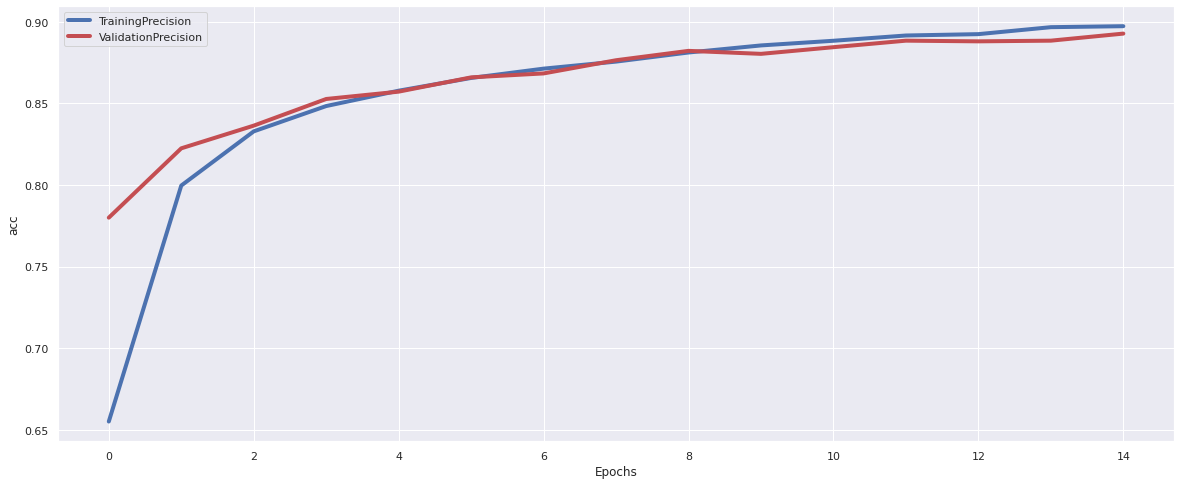

In [ ]:
plot_history(history,plot_type='acc')

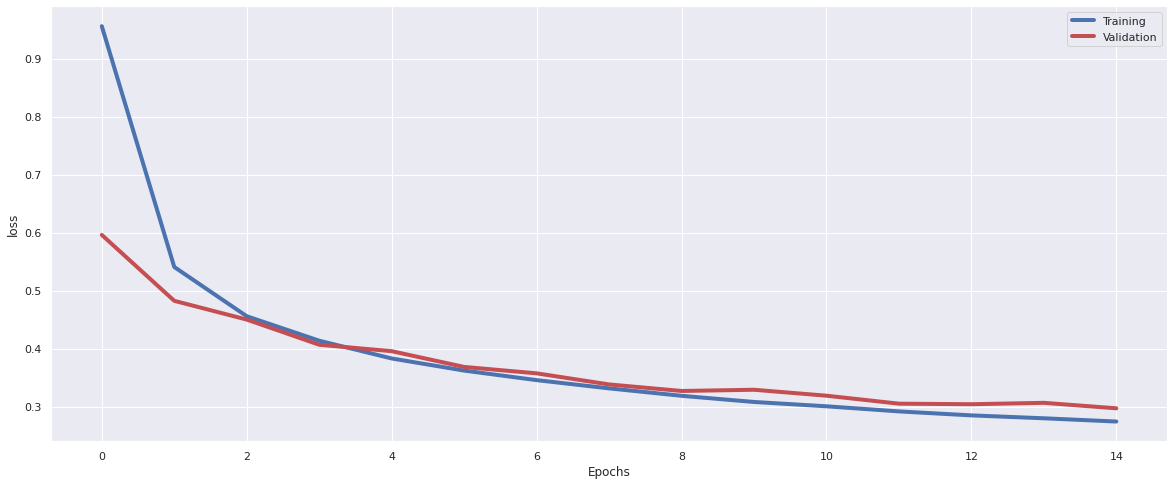

In [ ]:
plot_history(history,plot_type='loss')

Now let's evaluate the performance of our algorithm on the test set

In [ ]:
def convert_predictions(predictions):
  output = np.argmax(predictions,axis=1)
  return output

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
print('Weighted F1-score is %.2f' %f1_score(y_test, convert_predictions(predictions), average='weighted'))

Weighted F1-score is 0.89


Also, let's calculate top-3 accuracy

In [ ]:
from sklearn.metrics import top_k_accuracy_score

In [ ]:
print('Top-3 accuracy %.2f' %top_k_accuracy_score(y_test, predictions, k=3))

Top-3 accuracy 0.99


Finally, let's see the confusion matrix to see how we are performing with respect to each class.

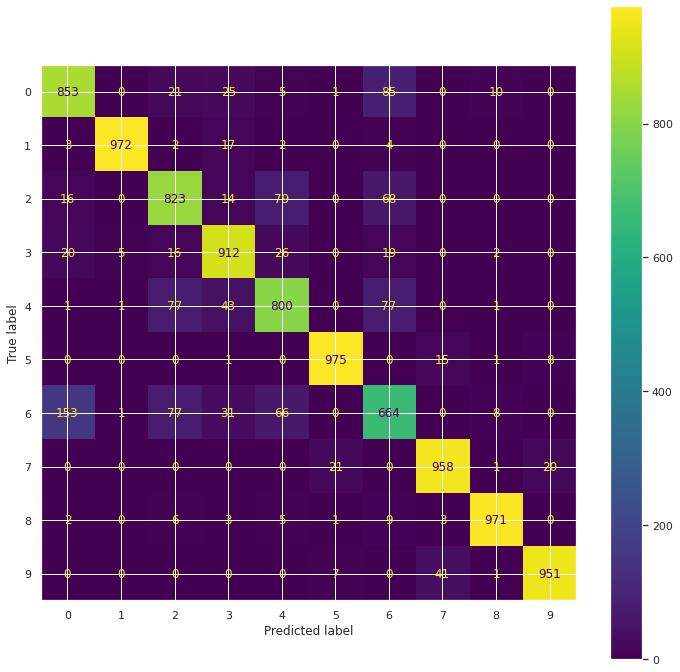

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(12, 12))
ConfusionMatrixDisplay.from_predictions(y_test, convert_predictions(predictions),ax=ax)
plt.show()

# Investigate the Effects of Different Parameters


### K-Fold Cross Validation

So far, we have seen the performance of the algorithm over the test set. But depending on the split, we might get lucky/unlucky and overestimate/underestimate the accuracy.

To resolve this issue, we will do k-fold cross validation, to be more sure about the performance of our algorithm.


In [ ]:
from sklearn.model_selection import KFold

To make things easier and allowing code recycling, we create a similar wrapper-function for k-fold cross validation and use it throughout this notebook. The inputs are:


*   no_folds: the number of folds we are going to use
*   plot_results: if True, the progress of training procedure is displayed and the resulting loss/accuracy is going to be dispayed after each fold is done.
*   models_params: this is the dictionry of the parameters we need to pass to the create_model() function above
*   training_params: these are the parameters used to tune the training algorithm

Once the inputs are specified, the function loops over the specified number of folds, and return the average and standard deviation of the accuracy over the validation set.



In [ ]:
kf = KFold(n_splits=3)
for train_index, val_index in kf.split(X_train,y_train):
    print(train_index)
    # break
    # train_set, y_train_set = X_train[train_index,:,:,:], y_train_enc[train_index]
    # val_set, y_val = X_train[val_index,:,:,:], y_train_enc[val_index]

[20000 20001 20002 ... 59997 59998 59999]
[    0     1     2 ... 59997 59998 59999]
[    0     1     2 ... 39997 39998 39999]


In [ ]:
def kfold_validation(no_folds: int=3, plot_results: bool=True,
                     model_params: dict={},training_params: dict={}):
  validation_set_accuracy = []
  models = []

  if plot_results:
    verbose=2
  else:
    verbose=0

  itr = 0
  kf = KFold(n_splits=no_folds)
  for train_index, val_index in kf.split(X_train,y_train):
    train_set, y_train_set = X_train[train_index,:,:,:], y_train_enc[train_index]
    val_set, y_val = X_train[val_index,:,:,:], y_train_enc[val_index]

    # First, create a new model
    model = create_model(**model_params)
    #model.summary()

    # Finally, let's fit the model
    history = model.fit(train_set, y_train_set,
                      validation_data=(val_set,y_val),
                      callbacks=[early_stopping],
                      verbose=verbose,
                      **training_params,
                      )


    # Finally, let's
    pred_val = model.predict(val_set)
    f1 = f1_score(convert_predictions(y_val), convert_predictions(pred_val), average='weighted')

    validation_set_accuracy.append(f1)
    models.append(model)

    # Plot the results
    if plot_results:
      plot_history(history, plot_type='acc')


  # Convert to numpy array
  validation_set_accuracy = np.array(validation_set_accuracy)

  # Return the best model (as an example)
  ind = np.argmax(validation_set_accuracy)
  best_model = models[ind]

  # Delete remaining models
  models.remove(best_model)
  for m in models:
    del m

  # Print the reults
  if plot_results:
    print('Average F1-Score over validation set is %.2f' %validation_set_accuracy.mean())
    print('STD of F1-Score over validation set is %.2f' %validation_set_accuracy.std())
  return best_model, validation_set_accuracy.mean(), validation_set_accuracy.std()

Here we define a function we used to evaluate the effect of different parameters.

In [ ]:
def evaluate_efect_param(parameter_type: str='kfold', parameter_name: str='', values_list: list=[]):
  scores_val = []
  scores_test = []
  models = []
  for val in values_list:

      if parameter_type == 'kfold':
        kfold_params[parameter_name] = val
      elif parameter_type == 'model_params':
        kfold_params['model_params'][parameter_name] = val
      elif parameter_type == 'training_params':
        kfold_params['training_params'][parameter_name] = val

      model, validation_set_accuracy_mean, validation_set_accuracy_std = kfold_validation(**kfold_params)

      scores_val.append(validation_set_accuracy_mean)

      predictions = model.predict(X_test)
      score_test = f1_score(y_test, convert_predictions(predictions), average='weighted')
      scores_test.append(score_test)

      models.append(model)
      print('Val: %s, Validation Score: %.3f, Test Score: %.3f' %(str(val), validation_set_accuracy_mean, score_test))


  # Plot the results
  plt.figure(figsize=(20,8))
  str_values_list = []
  for v in values_list:
    str_values_list.append(str(v))

  plt.plot(str_values_list,scores_test,lw=5)
  plt.plot(str_values_list,scores_val,lw=5,color='orange')
  plt.xlabel(parameter_name)
  plt.ylabel('F1-Score')
  plt.legend(['F1: Test Set','F1: Validation Set'])
  plt.show()

  # Get the best model
  ind = np.argmax(scores_val)
  best_model = models[ind]

  best_val = values_list[np.argmax(scores_val)]

  # Delete remaining models
  models.remove(best_model)
  for m in models:
    del m

  return best_model, best_val


In [ ]:
kfold_params = {
    'no_folds': 3,
    'plot_results': False,
    'model_params': {
      'hidden_layers': ['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2', 'Flatten','Dense_30'],
      'activation_func': 'relu',
      'l1_reg': 0,
      'l2_reg': 0,
      'learning_rate': 0.001,
      'learning_rate_decay': 0.9,
      'dropout_rate':0.01,
      'weight_initializer': 'GlorotNormal',
      'optimizer_name': 'adam',
      'regularization_type': 'kernel_regularizer',
  },
  'training_params': {
    'batch_size': 32,
    'epochs': 5
  }
}

In [ ]:
model, validation_set_accuracy_mean, validation_set_accuracy_std = kfold_validation(**kfold_params)

625/625 [==============================] - 1s 2ms/step


In [ ]:
print(validation_set_accuracy_mean, validation_set_accuracy_std)

0.8894432670595506 0.0026092072793868367


In [ ]:
kfold_params['plot_results'] = False

### Effect of Learning Rate
Now that we have tested the performance of the algorithm more thoroughly using k-fold cross validation, let's explore the effect of other parameters, starting with the learning rate.

313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.829, Test Score: 0.822
313/313 [==============================] - 1s 2ms/step
Val: 0.001, Validation Score: 0.890, Test Score: 0.886
313/313 [==============================] - 1s 2ms/step
Val: 0.01, Validation Score: 0.875, Test Score: 0.872


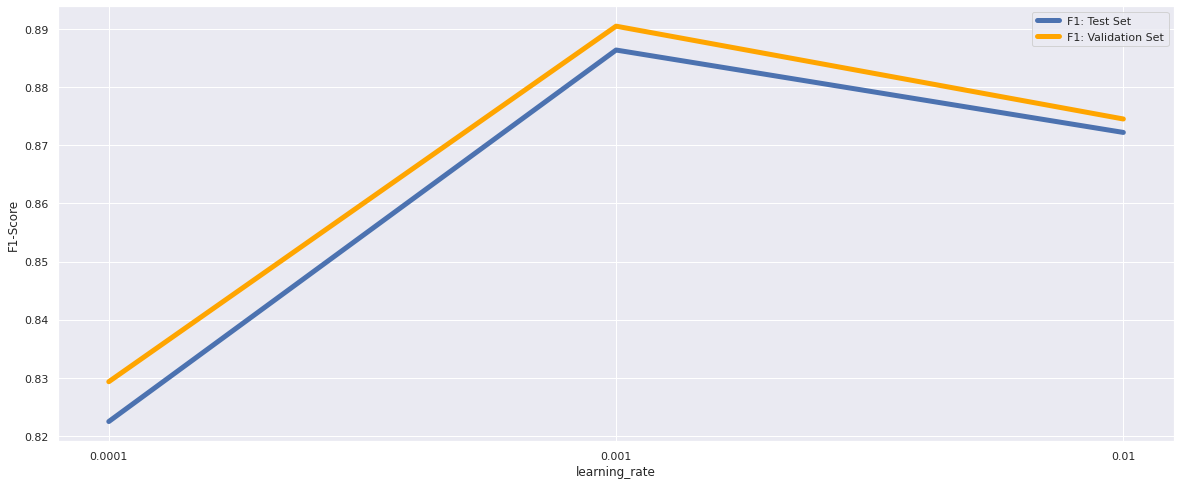

In [ ]:
model, best_lr = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate', values_list=[0.0001,0.001,.01])
kfold_params['model_params']['learning_rate'] = best_lr

### Effect of Learning Rate Decay
Another factor that could affect the speed of learning, as well as convergence, is the rate at which learning rate is decayed, i.e. after a few iterations, the algorithm can reduce learning rate in the hope not to miss the (local) minimum.

313/313 [==============================] - 1s 2ms/step
Val: 0.75, Validation Score: 0.886, Test Score: 0.882
313/313 [==============================] - 1s 2ms/step
Val: 0.85, Validation Score: 0.890, Test Score: 0.892
313/313 [==============================] - 1s 2ms/step
Val: 0.95, Validation Score: 0.886, Test Score: 0.884


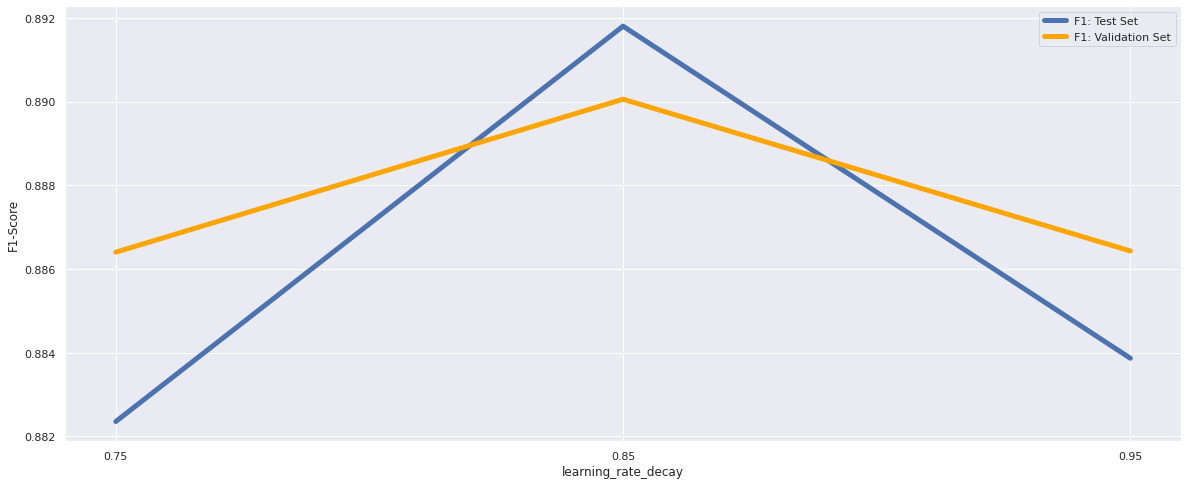

In [ ]:
model,best_lr_decay = evaluate_efect_param(parameter_type='model_params',parameter_name='learning_rate_decay', values_list=[0.75,0.85,0.95])
kfold_params['model_params']['learning_rate_decay'] = best_lr_decay

When the decay is too high (the rate is low), we get worse results, because the learning rate drops too fast, which means the learning will be slow and the algorithm underperforms.

On the other hand, if there is no decay or decay is very low, the algorithm might pass the optimum point and we get a worse result again. So this is something we need to tune as well.

### Effect of Optimizer
There are multiple opitmizers we can use in the training algorithm. Let's see if they have any effect on the performance.

313/313 [==============================] - 1s 2ms/step
Val: sgd, Validation Score: 0.717, Test Score: 0.723
313/313 [==============================] - 1s 2ms/step
Val: adam, Validation Score: 0.887, Test Score: 0.883
313/313 [==============================] - 1s 1ms/step
Val: RMSprop, Validation Score: 0.887, Test Score: 0.887
313/313 [==============================] - 1s 2ms/step
Val: Adadelta, Validation Score: 0.191, Test Score: 0.229


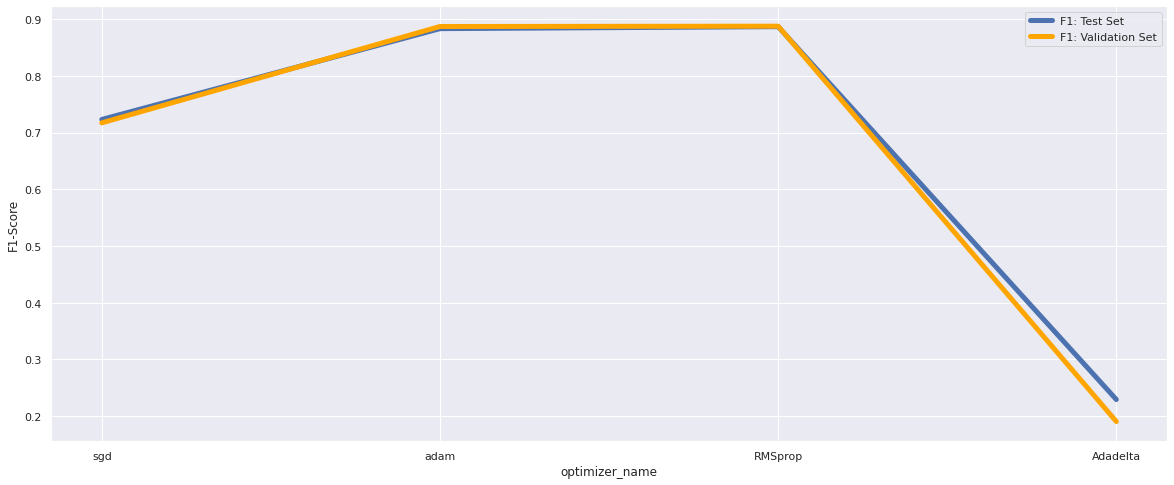

In [ ]:
model,best_optimizer = evaluate_efect_param(parameter_type='model_params',parameter_name='optimizer_name', values_list=['sgd','adam','RMSprop','Adadelta'])
kfold_params['model_params']['optimizer_name'] = best_optimizer

### Effect of Activation Functions

313/313 [==============================] - 1s 2ms/step
Val: relu, Validation Score: 0.889, Test Score: 0.886
313/313 [==============================] - 1s 2ms/step
Val: tanh, Validation Score: 0.888, Test Score: 0.883
313/313 [==============================] - 1s 2ms/step
Val: sigmoid, Validation Score: 0.840, Test Score: 0.835
313/313 [==============================] - 1s 2ms/step
Val: softplus, Validation Score: 0.853, Test Score: 0.854
313/313 [==============================] - 1s 2ms/step
Val: softsign, Validation Score: 0.887, Test Score: 0.882
313/313 [==============================] - 1s 2ms/step
Val: selu, Validation Score: 0.892, Test Score: 0.886


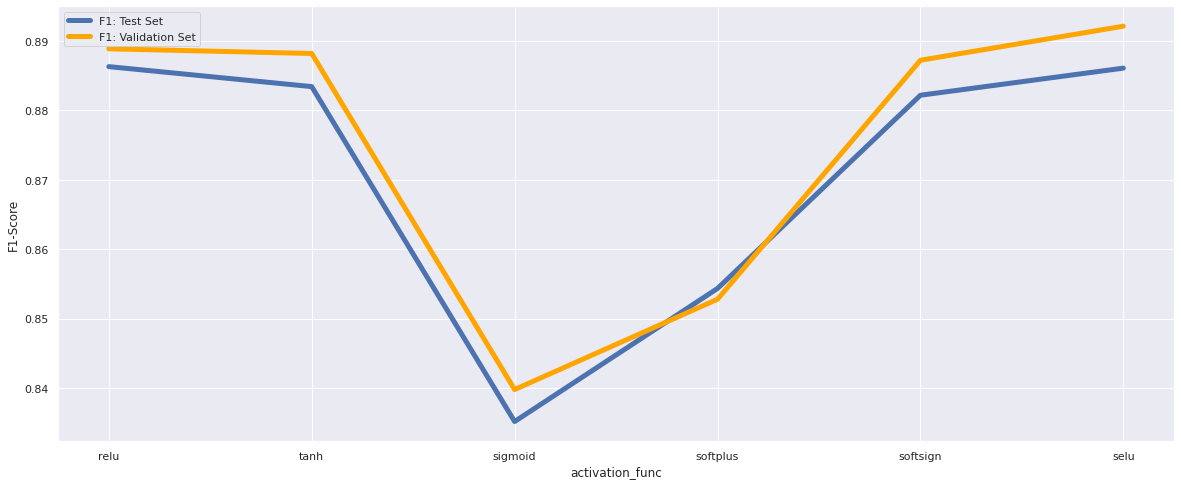

In [ ]:
model,best_activation_func = evaluate_efect_param(parameter_type='model_params',parameter_name='activation_func', values_list=['relu','tanh','sigmoid','softplus','softsign','selu'])
kfold_params['model_params']['activation_func'] = best_activation_func

### Effect of Weight Initialization Techniques


So let's check different weight initialization effect on the performance of the algorithm.

313/313 [==============================] - 1s 2ms/step
Val: RandomNormal, Validation Score: 0.888, Test Score: 0.879
313/313 [==============================] - 1s 2ms/step
Val: RandomUniform, Validation Score: 0.885, Test Score: 0.887
313/313 [==============================] - 1s 2ms/step
Val: Zeros, Validation Score: 0.018, Test Score: 0.018
313/313 [==============================] - 1s 2ms/step
Val: GlorotUniform, Validation Score: 0.892, Test Score: 0.888
313/313 [==============================] - 1s 2ms/step
Val: GlorotNormal, Validation Score: 0.891, Test Score: 0.888


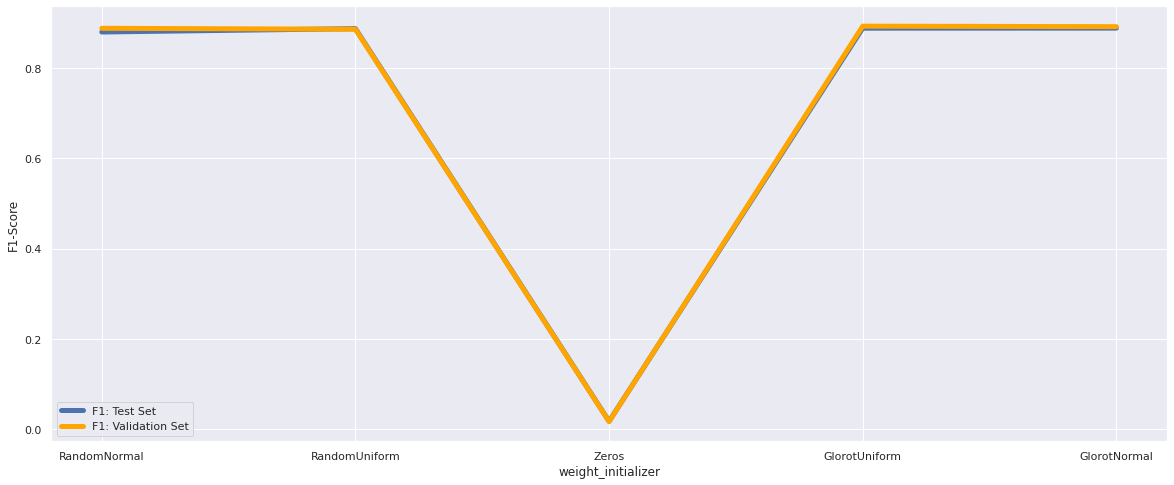

In [ ]:
weight_initializers=['RandomNormal','RandomUniform','Zeros','GlorotUniform','GlorotNormal']
model,best_weight_initializer = evaluate_efect_param(parameter_type='model_params',parameter_name='weight_initializer', values_list=weight_initializers)
kfold_params['model_params']['weight_initializer'] = best_weight_initializer

### Effect of Dropout
Dropout is the process of ignoring some neuron randomly during each training epoch. In principle, it should add robustness to our algorithm, as it forces neurons to learn features that are not just specific to the training set.


313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.890, Test Score: 0.884
313/313 [==============================] - 1s 2ms/step
Val: 0.01, Validation Score: 0.890, Test Score: 0.886
313/313 [==============================] - 1s 2ms/step
Val: 0.1, Validation Score: 0.892, Test Score: 0.884
313/313 [==============================] - 1s 2ms/step
Val: 0.3, Validation Score: 0.888, Test Score: 0.888


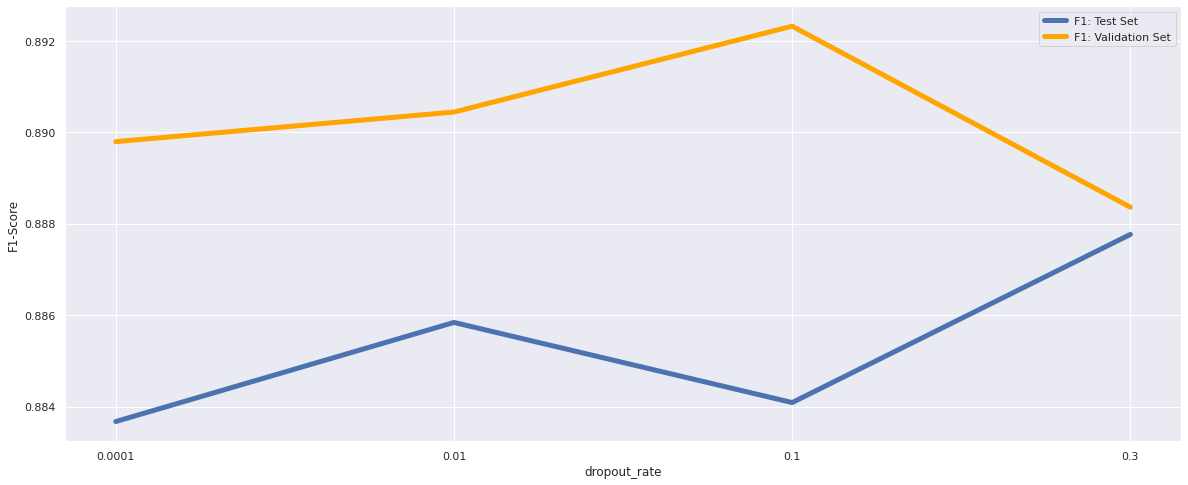

In [ ]:
model,best_dropout_rate = evaluate_efect_param(parameter_type='model_params',parameter_name='dropout_rate', values_list=[0.0001,0.01,0.1,0.3])
kfold_params['model_params']['dropout_rate'] = best_dropout_rate

### Effect of L1 and L2 Regularization
Regularization has an important role in preventing overfitting. Therefore, it would be interesting to see how they affect the performance of our neural network.

*   **kernel_regularizer:** applies regularization penalty to the weights
*   **activity_regularizer:** regularizes the *output* neurons of a layer, in order to keep their value bounded (similar to normalizing te output)
*   **bias_regularizer:** applies regularization to the bias (i.e. the contant threshold) in neurons. The higher bias_regularizer is, the closer the bias would be to zero.



313/313 [==============================] - 1s 2ms/step
Val: 1e-05, Validation Score: 0.891, Test Score: 0.888
313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.883, Test Score: 0.882
313/313 [==============================] - 1s 2ms/step
Val: 0.001, Validation Score: 0.838, Test Score: 0.844
313/313 [==============================] - 1s 2ms/step
Val: 0.01, Validation Score: 0.795, Test Score: 0.782


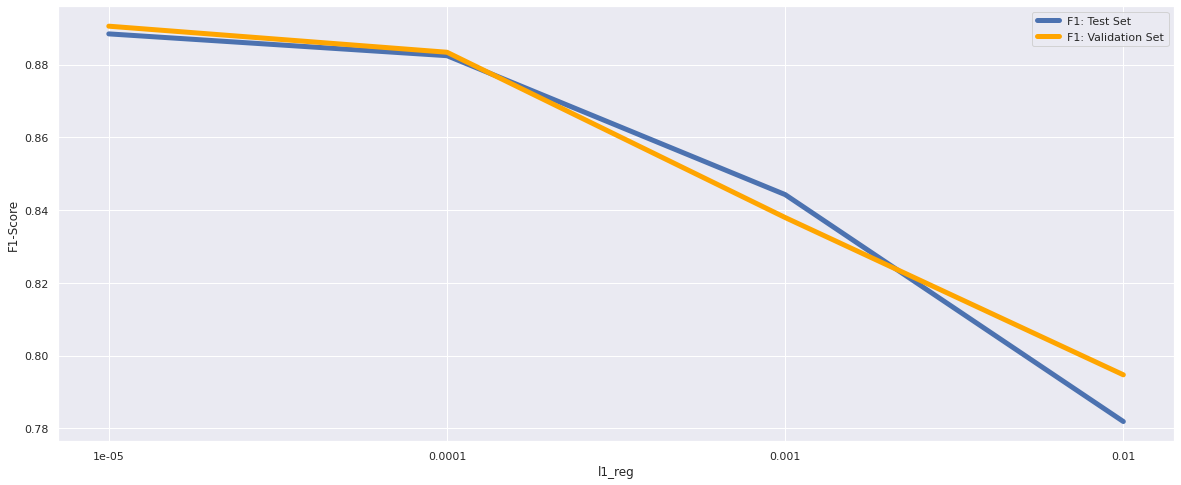

In [ ]:
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l1_reg'] = best_l1_reg

Likewise, we can test effects of L2-regularization:

313/313 [==============================] - 1s 2ms/step
Val: 1e-05, Validation Score: 0.892, Test Score: 0.885
313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.889, Test Score: 0.886
313/313 [==============================] - 1s 2ms/step
Val: 0.001, Validation Score: 0.882, Test Score: 0.881
313/313 [==============================] - 1s 2ms/step
Val: 0.01, Validation Score: 0.857, Test Score: 0.860


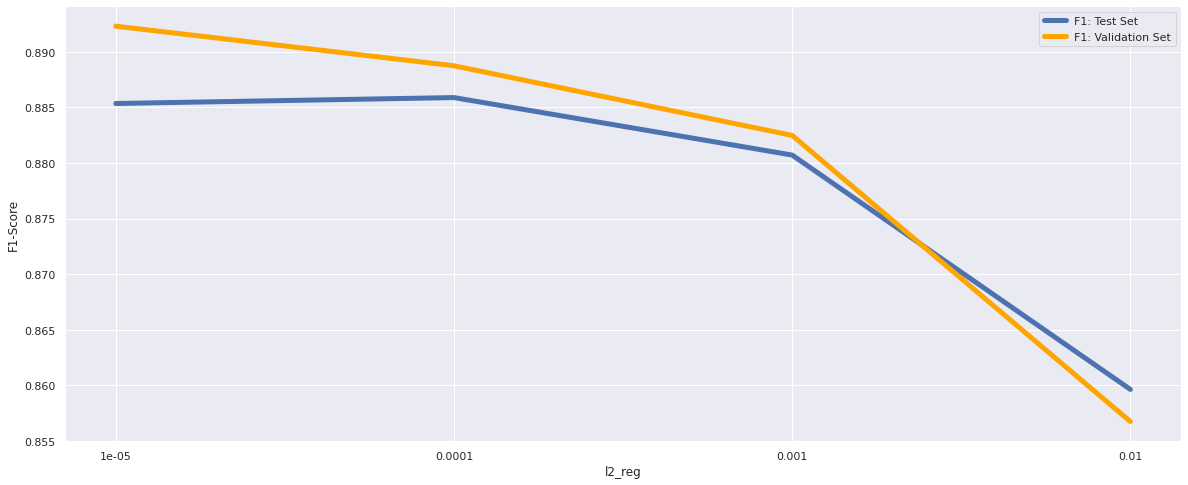

In [ ]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l2_reg'] = best_l2_reg

Let's also check the effect of regularization on the activation functions

313/313 [==============================] - 1s 2ms/step
Val: 1e-05, Validation Score: 0.889, Test Score: 0.885
313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.887, Test Score: 0.883
313/313 [==============================] - 1s 2ms/step
Val: 0.001, Validation Score: 0.874, Test Score: 0.868
313/313 [==============================] - 1s 1ms/step
Val: 0.01, Validation Score: 0.851, Test Score: 0.850


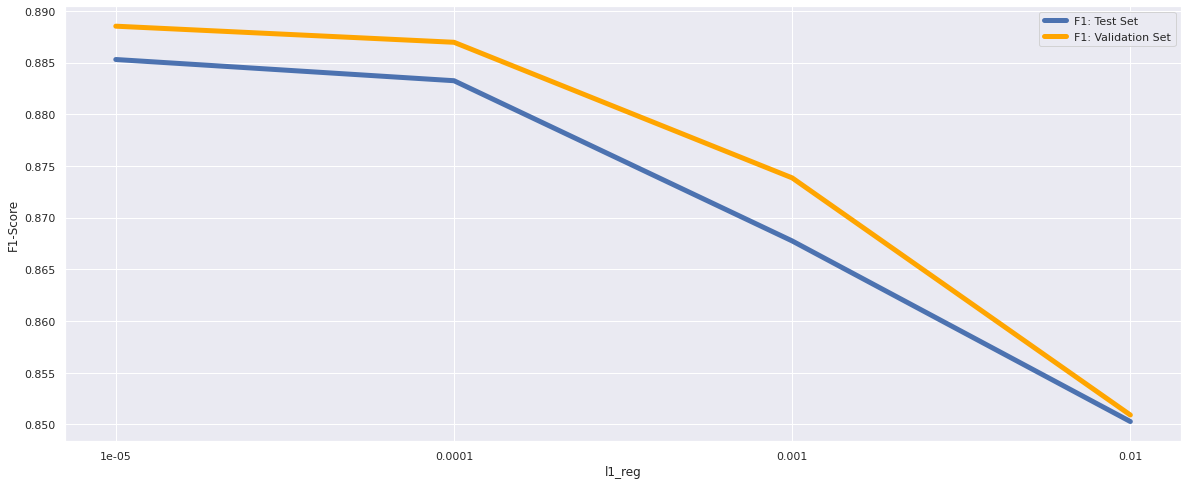

In [ ]:
kfold_params['model_params']['regularization_type'] = 'activity_regularizer'
model,best_l1_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l1_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l1_reg'] = best_l1_reg

313/313 [==============================] - 1s 2ms/step
Val: 1e-05, Validation Score: 0.887, Test Score: 0.890
313/313 [==============================] - 1s 2ms/step
Val: 0.0001, Validation Score: 0.883, Test Score: 0.884
313/313 [==============================] - 1s 2ms/step
Val: 0.001, Validation Score: 0.887, Test Score: 0.882
313/313 [==============================] - 1s 1ms/step
Val: 0.01, Validation Score: 0.876, Test Score: 0.872


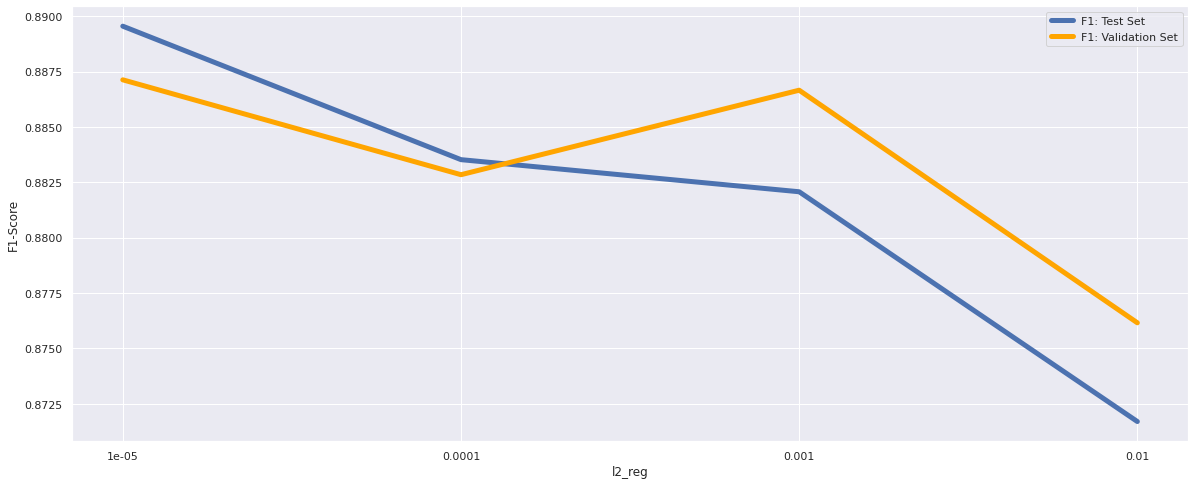

In [ ]:
model,best_l2_reg = evaluate_efect_param(parameter_type='model_params',parameter_name='l2_reg', values_list=[0.00001,0.0001,0.001,0.01])
kfold_params['model_params']['l2_reg'] = best_l2_reg

I will save the hyperparameters we found in the previous cells in the following cell, so I don't need to run them everytime according to limits of google colab.

In [ ]:
kfold_params['model_params']['learning_rate'] = 0.001
kfold_params['model_params']['learning_rate_decay'] = 0.85
kfold_params['model_params']['optimizer_name'] = 'adam'
kfold_params['model_params']['activation_func'] = 'selu'
kfold_params['model_params']['weight_initializer'] = 'GlorotUniform'
kfold_params['model_params']['dropout_rate'] = 0.1
kfold_params['model_params']['l1_reg'] = 0.00001
kfold_params['model_params']['l2_reg'] = 0.00001

## How about a Different Architecture?
So far, we have kept the structure of network intact. What if we add more layers, with different number of neurons? will that affect the performance?


### Effect of Kernel Size
Let's start with a network with a different kernel size for Conv2D.

In [ ]:
# list=['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2', 'Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_10_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.889, Test Score: 0.882
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_5x5_10_1', 'MaxPooling2D_2x2_2', 'Conv2D_6x6_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.874, Test Score: 0.870
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_7x7_10_1', 'MaxPooling2D_2x2_2', 'Conv2D_8x8_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.877, Test Score: 0.871


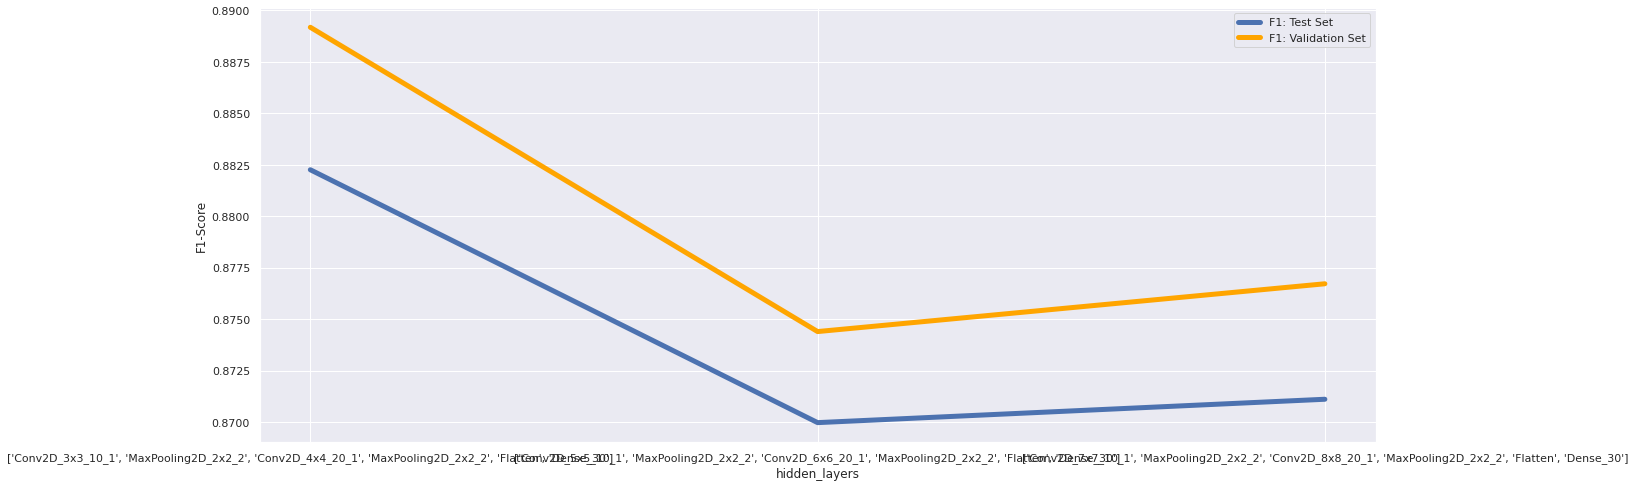

In [ ]:
# First Conv2D kernel size = 3 and Second Conv2D kernel size = 4
values_list = [['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# First Conv2D kernel size = 5 and Second Conv2D kernel size = 6
values_list += [['Conv2D_5x5_10_1','MaxPooling2D_2x2_2','Conv2D_6x6_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# First Conv2D kernel size = 7 and Second Conv2D kernel size = 8
values_list += [['Conv2D_7x7_10_1','MaxPooling2D_2x2_2','Conv2D_8x8_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='hidden_layers',values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

### Effect Convolution Stride
Next, let's see what the best stride is.

In [ ]:
# list=['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2', 'Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_10_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.888, Test Score: 0.880
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_10_2', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_20_2', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.852, Test Score: 0.848
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_10_2', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.836, Test Score: 0.826


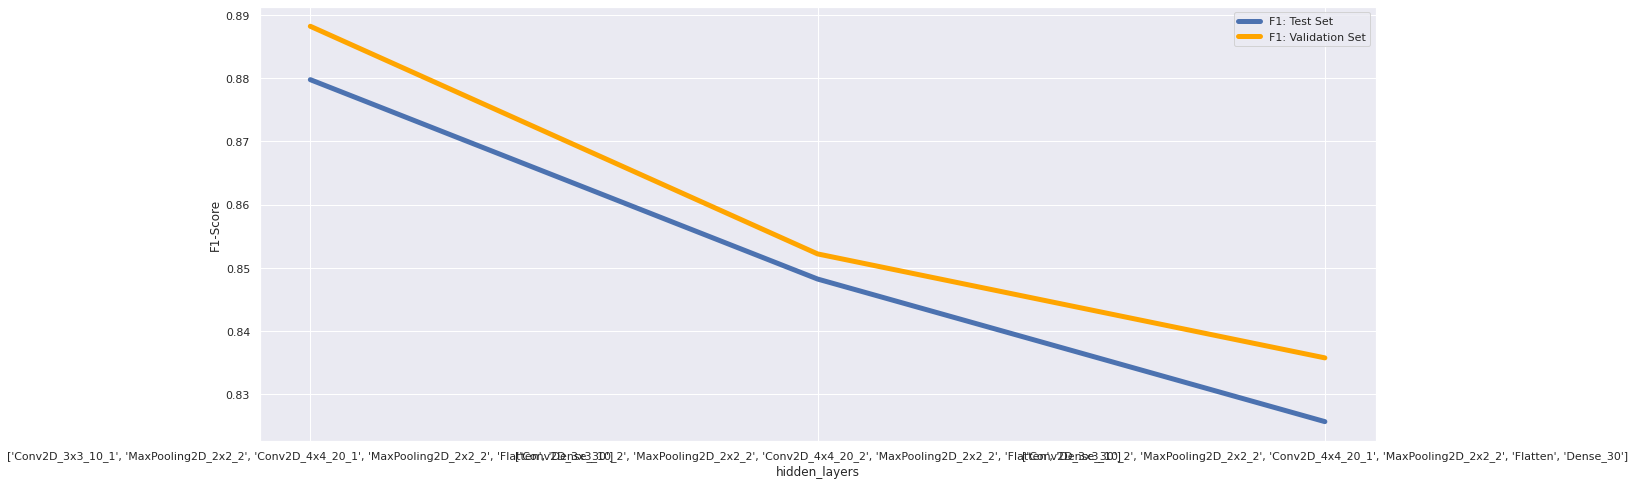

In [ ]:
# Stride 1
values_list = [['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# Stride 2
values_list += [['Conv2D_3x3_10_2','MaxPooling2D_2x2_2','Conv2D_4x4_20_2','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# Stride 2 and 1
values_list += [['Conv2D_3x3_10_2','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='hidden_layers',values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

### Effect Of Number of Filters
Next, let's explore how adding more filters help. We fix receptive field size and stride.

In [ ]:
# list=['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2', 'Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_5_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_10_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.876, Test Score: 0.873
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_10_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_20_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.890, Test Score: 0.884
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.896, Test Score: 0.893


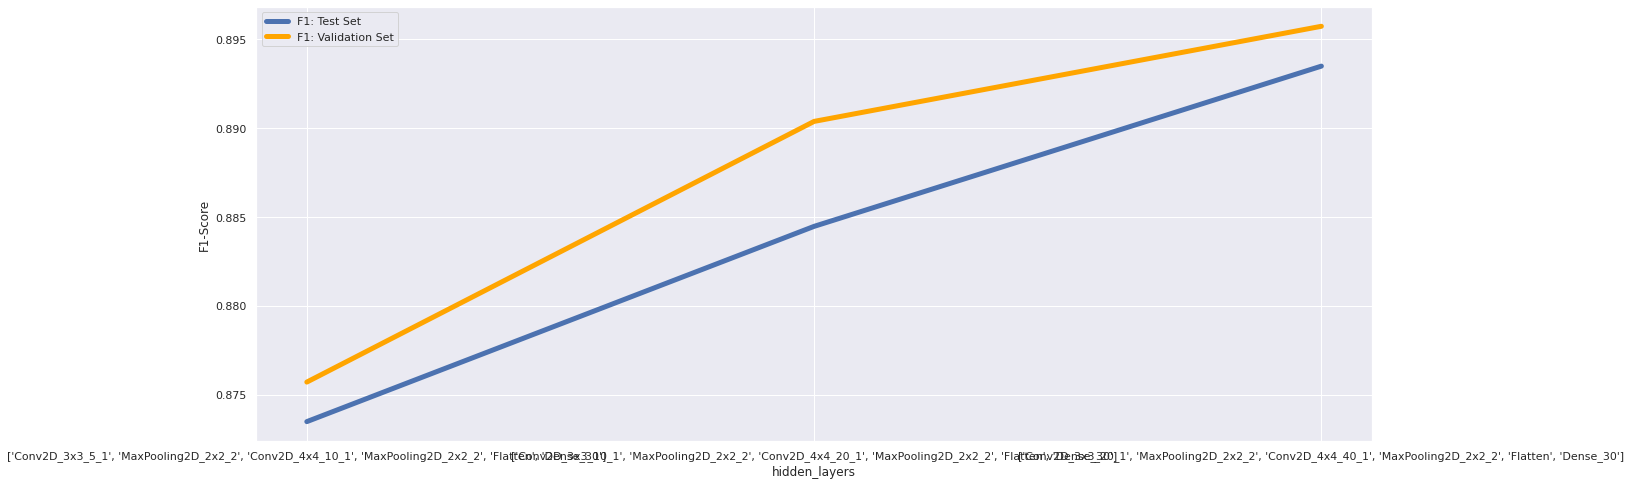

In [ ]:
# No. filters = 5 and 10
values_list = [['Conv2D_3x3_5_1','MaxPooling2D_2x2_2','Conv2D_4x4_10_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# No. filters = 10 and 20
values_list += [['Conv2D_3x3_10_1','MaxPooling2D_2x2_2','Conv2D_4x4_20_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# No. filters = 20 and 40
values_list += [['Conv2D_3x3_20_1','MaxPooling2D_2x2_2','Conv2D_4x4_40_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='hidden_layers',values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

### Effect Of Pooling type
Now let's investigate the effect of the pooling layer. We fix all the other values.

In [ ]:
# ['Conv2D_3x3_20_1','MaxPooling2D_2x2_2','Conv2D_4x4_40_1','MaxPooling2D_2x2_2','Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.895, Test Score: 0.897
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'AveragePooling2D_2x2_2', 'Conv2D_4x4_40_1', 'AveragePooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.869, Test Score: 0.867


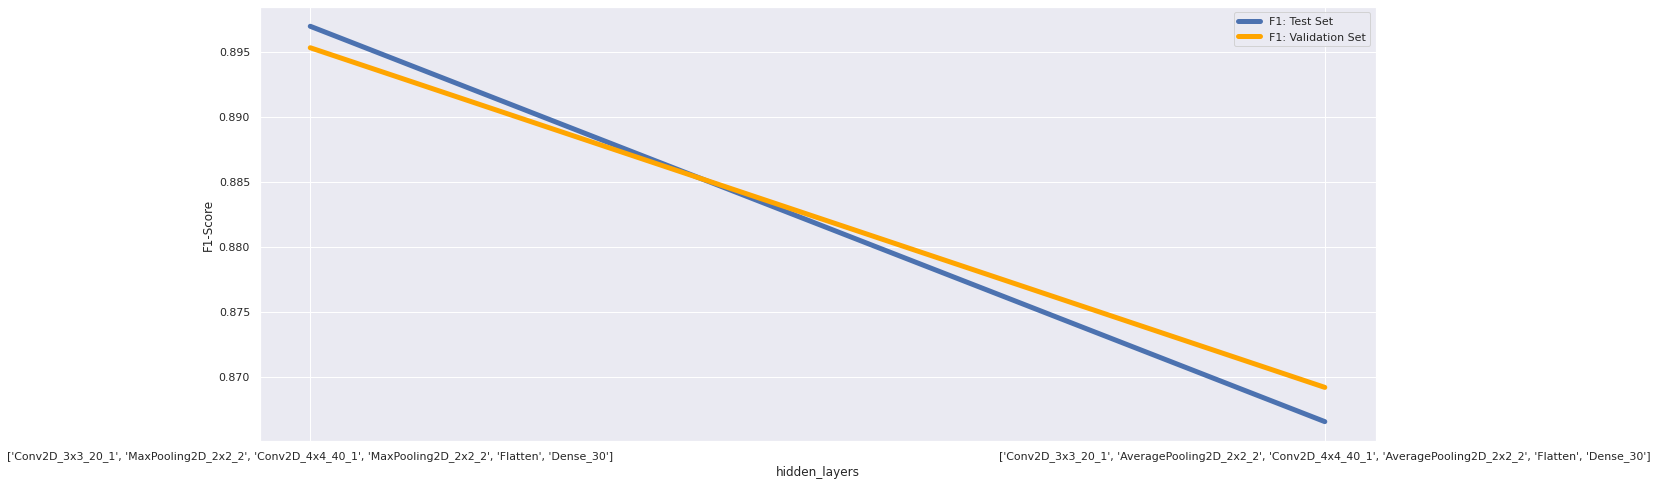

In [ ]:
# MaxPooling with stride 2
values_list = [['Conv2D_3x3_20_1','MaxPooling2D_2x2_2','Conv2D_4x4_40_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# AveragePooling with stride 2
values_list += [['Conv2D_3x3_20_1','AveragePooling2D_2x2_2','Conv2D_4x4_40_1','AveragePooling2D_2x2_2','Flatten','Dense_30']]


model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='hidden_layers',values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

### Effect Of Pooling size
Now let's investigate the effect of the pooling size. We fix all the other values.

In [ ]:
# ['Conv2D_3x3_20_1','MaxPooling2D_2x2_2','Conv2D_4x4_40_1','MaxPooling2D_2x2_2','Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_2x2_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_2x2_2', 'Flatten', 'Dense_30'], Validation Score: 0.895, Test Score: 0.893
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_3x3_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_3x3_2', 'Flatten', 'Dense_30'], Validation Score: 0.896, Test Score: 0.893
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_4x4_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_4x4_2', 'Flatten', 'Dense_30'], Validation Score: 0.889, Test Score: 0.885


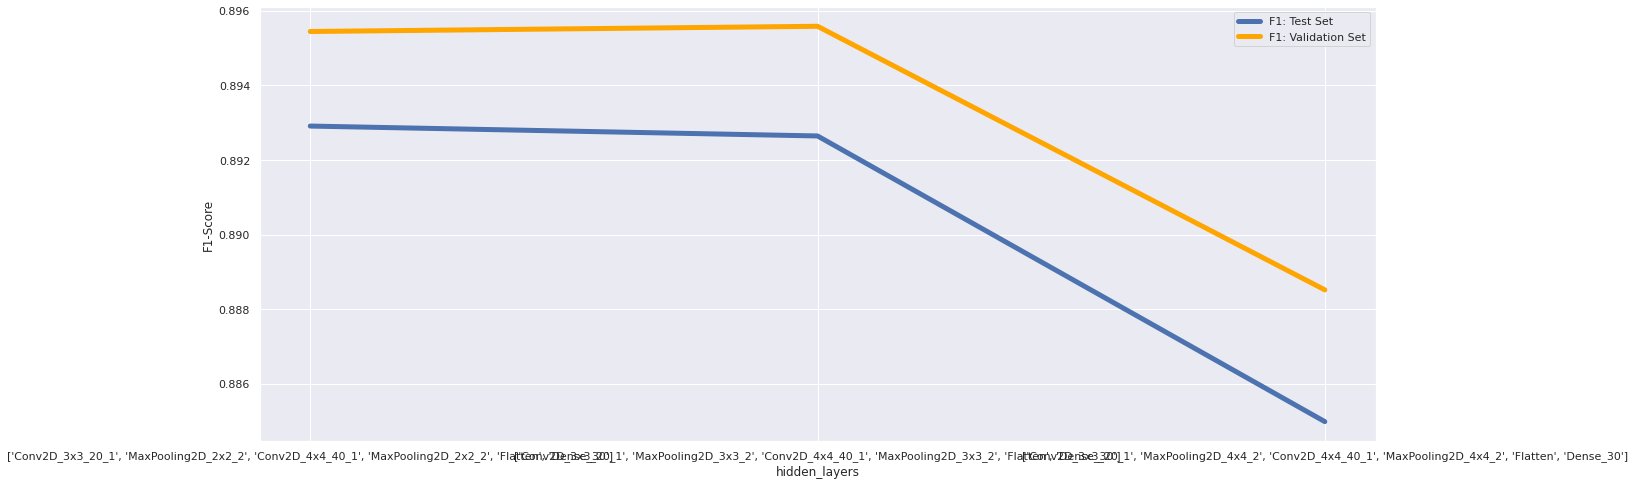

In [ ]:
# MaxPooling with size 2
values_list = [['Conv2D_3x3_20_1','MaxPooling2D_2x2_2','Conv2D_4x4_40_1','MaxPooling2D_2x2_2','Flatten','Dense_30']]

# MaxPooling with size 3
values_list += [['Conv2D_3x3_20_1','MaxPooling2D_3x3_2','Conv2D_4x4_40_1','MaxPooling2D_3x3_2','Flatten','Dense_30']]

# MaxPooling with size 4
values_list += [['Conv2D_3x3_20_1','MaxPooling2D_4x4_2','Conv2D_4x4_40_1','MaxPooling2D_4x4_2','Flatten','Dense_30']]

model,best_architecture = evaluate_efect_param(parameter_type='model_params',parameter_name='hidden_layers',values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

### Effect Of Stride for Pooling layer
Now let's investigate the effect of the stride of pooling layer. We fix all the other values.

In [ ]:
# ['Conv2D_3x3_20_1','MaxPooling2D_3x3_2','Conv2D_4x4_40_1','MaxPooling2D_3x3_2','Flatten','Dense_30']

313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_3x3_1', 'Conv2D_4x4_40_1', 'MaxPooling2D_3x3_1', 'Flatten', 'Dense_30'], Validation Score: 0.896, Test Score: 0.896
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_3x3_2', 'Conv2D_4x4_40_1', 'MaxPooling2D_3x3_2', 'Flatten', 'Dense_30'], Validation Score: 0.892, Test Score: 0.888
313/313 [==============================] - 1s 2ms/step
Val: ['Conv2D_3x3_20_1', 'MaxPooling2D_3x3_3', 'Conv2D_4x4_40_1', 'MaxPooling2D_3x3_3', 'Flatten', 'Dense_30'], Validation Score: 0.855, Test Score: 0.847


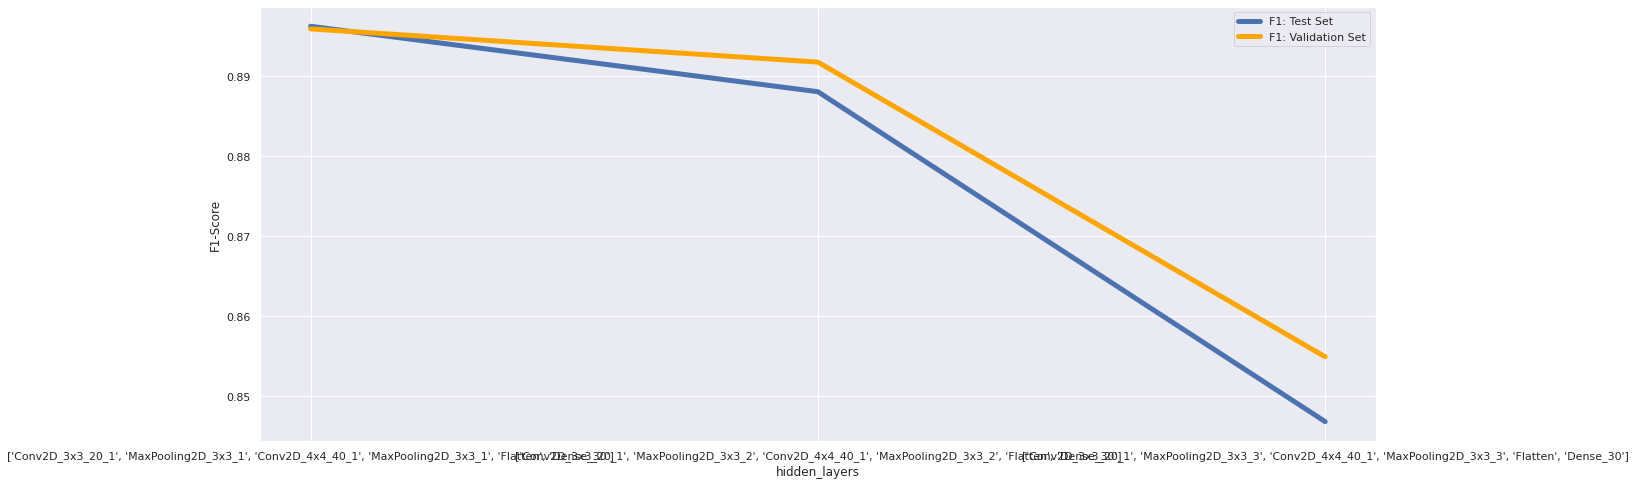

In [ ]:
# MaxPooling stride 1
values_list = [['Conv2D_3x3_20_1','MaxPooling2D_3x3_1','Conv2D_4x4_40_1','MaxPooling2D_3x3_1','Flatten','Dense_30']]

# MaxPooling stride 2
values_list += [['Conv2D_3x3_20_1','MaxPooling2D_3x3_2','Conv2D_4x4_40_1','MaxPooling2D_3x3_2','Flatten','Dense_30']]

# MaxPooling stride 3
values_list += [['Conv2D_3x3_20_1','MaxPooling2D_3x3_3','Conv2D_4x4_40_1','MaxPooling2D_3x3_3','Flatten','Dense_30']]

model, best_architecture = evaluate_efect_param(parameter_type='model_params', parameter_name='hidden_layers', values_list=values_list)
kfold_params['model_params']['hidden_layers'] = best_architecture

Our final best architecture is:

In [ ]:
kfold_params['model_params']['hidden_layers'] = ['Conv2D_3x3_20_1','MaxPooling2D_3x3_1','Conv2D_4x4_40_1','MaxPooling2D_3x3_1','Flatten','Dense_30']

# Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator#, array_to_img, img_to_array, load_img

We have several options to create new images from our existing images (brought from [Keras's tutorial here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)):


*   `rotation_range`: is a value in degrees (0-180), a range within which to randomly rotate pictures
*   `width_shift` and `height_shift`: are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
*   `rescale`:  is a value by which we will multiply the data before any other processing (similar to the approach we used above to divide all pixels by 255, we could have set `rescale` to 1/255. here).
*   `shear_range`: is for randomly applying shearing transformations
*   `zoom_range`: is for randomly zooming inside pictures
*   `horizontal_flip`: is for randomly flipping half of the images horizontally
*   `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

### Preprocessing
We can achieve preprocessing directly here as well. In our previous approaches, `StandardScaler` made a givne column (attribute) have zero-mean and a standard deviation of 1.

When preporcessing images, our attributes are pixels and making a given pixel have zero mean and a satndard deviation of 1 across all training images is a process called "whitenning" and can be directly accomplished using the `ImageDataGenerator`  class.

### Putting it Altogether
Let's combine all the options and create a complete image generator.

In [ ]:
train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        featurewise_center=True,
        featurewise_std_normalization=True,
        fill_mode='nearest',
        validation_split=0.2
        )

#test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_iterator = train_datagen.flow(X_train, y_train_enc,subset='training',batch_size=32)
val_iterator = train_datagen.flow(X_train, y_train_enc,subset='validation',batch_size=32)

In [ ]:
history = model.fit_generator(
      train_iterator,
      validation_data=val_iterator,
      callbacks=[early_stopping],
      steps_per_epoch=len(train_iterator),
      validation_steps=len(val_iterator),
      verbose=2,
      epochs=15,
)

Epoch 1/15
1500/1500 - 30s - loss: 1.7947 - accuracy: 0.3429 - val_loss: 1.4920 - val_accuracy: 0.4546 - 30s/epoch - 20ms/step
Epoch 2/15
1500/1500 - 23s - loss: 1.3728 - accuracy: 0.5071 - val_loss: 1.2946 - val_accuracy: 0.5337 - 23s/epoch - 15ms/step
Epoch 3/15
1500/1500 - 23s - loss: 1.2516 - accuracy: 0.5440 - val_loss: 1.1932 - val_accuracy: 0.5695 - 23s/epoch - 15ms/step
Epoch 4/15
1500/1500 - 23s - loss: 1.1690 - accuracy: 0.5705 - val_loss: 1.1367 - val_accuracy: 0.5861 - 23s/epoch - 15ms/step
Epoch 5/15
1500/1500 - 24s - loss: 1.1016 - accuracy: 0.5966 - val_loss: 1.0648 - val_accuracy: 0.6065 - 24s/epoch - 16ms/step
Epoch 6/15
1500/1500 - 23s - loss: 1.0509 - accuracy: 0.6122 - val_loss: 1.0338 - val_accuracy: 0.6242 - 23s/epoch - 15ms/step
Epoch 7/15
1500/1500 - 23s - loss: 1.0039 - accuracy: 0.6257 - val_loss: 0.9810 - val_accuracy: 0.6400 - 23s/epoch - 15ms/step
Epoch 8/15
1500/1500 - 23s - loss: 0.9677 - accuracy: 0.6407 - val_loss: 0.9589 - val_accuracy: 0.6448 - 23s/ep

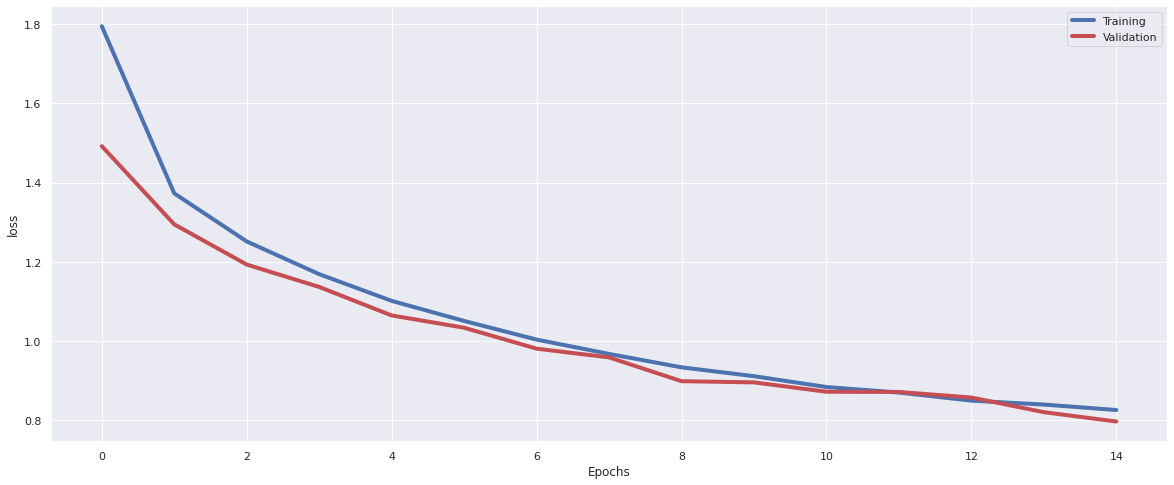

In [ ]:
plot_history(history,plot_type='loss')

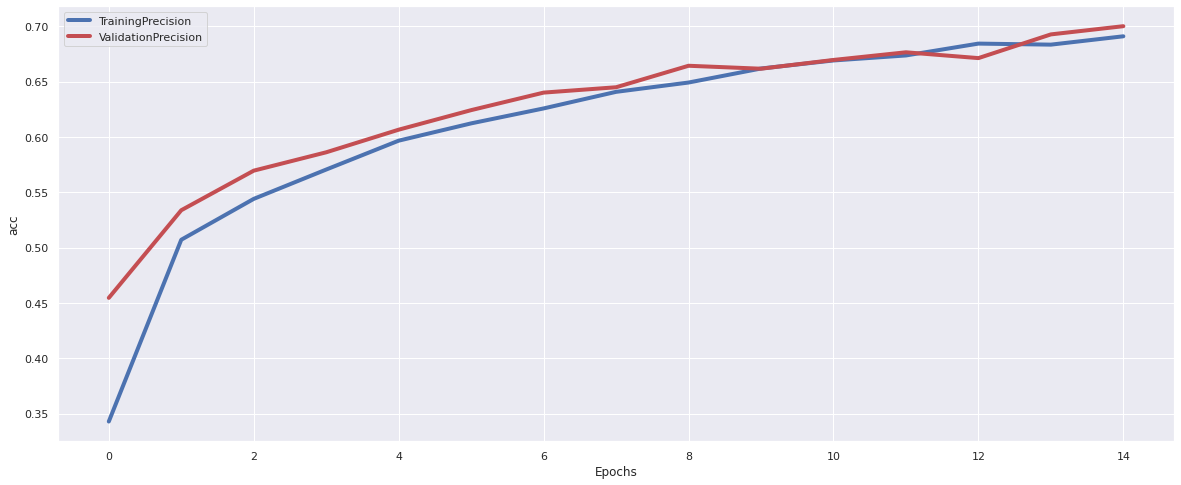

In [ ]:
plot_history(history,plot_type='acc')

In [ ]:
predictions = model.predict(X_test)
print('Weighted F1-score is %.2f' %f1_score(y_test, convert_predictions(predictions), average='weighted'))

313/313 [==============================] - 1s 2ms/step
Weighted F1-score is 0.75


In [ ]:
print('Top-3accuracy %s' % top_k_accuracy_score(y_test, predictions, k=3))

Top-3accuracy 0.9666


# Transfer Learning





Our dataset have only one channel and we can't use 'Imagenet' because its trained on colorful images. I found a solution in [StackOverflow](https://stackoverflow.com/questions/51995977/how-can-i-use-a-pre-trained-neural-network-with-grayscale-images). According to this solution what we can do is expand our channel to three. We just need to make the image to appear to be RGB. The easiest way to do so is to repeat the image array 3 times on a new dimension. Because we will have the same image over all 3 channels, the performance of the model should be the same as it was on RGB images.

Second problem is VGG19 on imagenet accepts images with shapes larger tahn 32x32 so we need to reshape our 28x28 size images.

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from skimage.transform import resize
X_train_resized = resize(X_train, (60000, 32, 32, 1))
X_test_resized = resize(X_test, (10000, 32, 32, 1))

In [ ]:
print(X_train_resized.shape)
print(X_test_resized.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [ ]:
X_train_resized_repeated = np.repeat(X_train_resized, 3, -1)
X_test_resized_repeated = np.repeat(X_test_resized, 3, -1)

In [ ]:
print(X_train_resized_repeated.shape)
print(X_test_resized_repeated.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


#### VGG19 Model
Let's start by using the famous VGG19 model

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
def create_transfer_model(base_model,learning_rate=0.001,learning_rate_decay=0.9,no_classes=y_train_enc.shape[1]):
  model = Sequential()
  model.add(base_model)           #Adds the base model
  model.add(Flatten())
  model.add(Dense(128,activation=('relu')))
  model.add(Dropout(.2))
  model.add(Dense(no_classes,activation=('softmax')))

  model.compile(
          loss='categorical_crossentropy',
          optimizer= tf.keras.optimizers.Adam(lr=learning_rate, beta_1=learning_rate_decay),
          metrics=['accuracy'],
          )
  return model


In [ ]:
base_model = VGG19(
    include_top=False,    # We do not include the top, because we just need the feature extraction layers
    weights='imagenet',
    input_shape=X_train_resized_repeated.shape[1:],
    classes=y_train_enc.shape[1])

# We make the weight non-trainable to reduce the number of weights in the network
for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 2s 0us/step


In [ ]:
model = create_transfer_model(base_model)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 20,091,338
Trainable params: 66,954
Non-trainable params: 20,024,384
_________________________________________________________________


Now that we have the base model, let's train it and see what performance we get by training the last few layers.

In [ ]:
train_resized_repeated_iterator = train_datagen.flow(X_train_resized_repeated, y_train_enc,subset='training',batch_size=32)
val_resized_repeated_iterator = train_datagen.flow(X_train_resized_repeated, y_train_enc,subset='validation',batch_size=32)

In [ ]:
history = model.fit_generator(
      train_resized_repeated_iterator,
      validation_data=val_resized_repeated_iterator,
      callbacks=[early_stopping],
      steps_per_epoch=len(train_resized_repeated_iterator),
      validation_steps=len(val_resized_repeated_iterator),
      verbose=1,
      epochs=10,
)

Epoch 1/10
1500/1500 [==============================] - 50s 29ms/step - loss: 0.9260 - accuracy: 0.6696 - val_loss: 0.7417 - val_accuracy: 0.7363
Epoch 2/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.7558 - accuracy: 0.7241 - val_loss: 0.7062 - val_accuracy: 0.7439
Epoch 3/10
1500/1500 [==============================] - 47s 32ms/step - loss: 0.7153 - accuracy: 0.7371 - val_loss: 0.6797 - val_accuracy: 0.7544
Epoch 4/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.7002 - accuracy: 0.7424 - val_loss: 0.6600 - val_accuracy: 0.7558
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.6858 - accuracy: 0.7468 - val_loss: 0.6430 - val_accuracy: 0.7645
Epoch 6/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.6691 - accuracy: 0.7533 - val_loss: 0.6396 - val_accuracy: 0.7620
Epoch 7/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.6730 - accuracy: 0.7491 - val_loss: 0.6395 -

In [ ]:
predictions = model.predict(X_test_resized_repeated)
print('Weighted F1-score is %.2f' %f1_score(y_test, convert_predictions(predictions), average='weighted'))

313/313 [==============================] - 4s 12ms/step
Weighted F1-score is 0.79


In [ ]:
print('Top-3accuracy %s' % top_k_accuracy_score(y_test, predictions, k=3))

Top-3accuracy 0.9631


In [ ]:
import copy
model_vgg = copy.deepcopy(model)

#### ResNet Model
Next, we try the well know ResNet50 model. The steps are basically the same as above, except for the base model.

In [ ]:
from keras.applications import resnet

base_model = resnet.ResNet50(
    include_top=False,    # We do not include the top, because we just need the feature extraction layers
    weights='imagenet',
    input_shape=X_train_resized_repeated.shape[1:],
    classes=y_train_enc.shape[1])

# We make the weight non-trainable to reduce the number of weights in the network
for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
model = create_transfer_model(base_model)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 23,851,274
Trainable params: 263,562
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
history = model.fit_generator(
      train_resized_repeated_iterator,
      validation_data=val_resized_repeated_iterator,
      callbacks=[early_stopping],
      steps_per_epoch=len(train_resized_repeated_iterator),
      validation_steps=len(val_resized_repeated_iterator),
      verbose=1,
      epochs=20,
)

Epoch 1/20
1500/1500 [==============================] - 64s 40ms/step - loss: 1.7993 - accuracy: 0.3187 - val_loss: 1.5554 - val_accuracy: 0.4190
Epoch 2/20
1500/1500 [==============================] - 51s 34ms/step - loss: 1.5916 - accuracy: 0.3980 - val_loss: 1.4213 - val_accuracy: 0.4808
Epoch 3/20
1500/1500 [==============================] - 50s 33ms/step - loss: 1.5215 - accuracy: 0.4261 - val_loss: 1.4177 - val_accuracy: 0.4770
Epoch 4/20
1500/1500 [==============================] - 51s 34ms/step - loss: 1.4970 - accuracy: 0.4377 - val_loss: 1.4075 - val_accuracy: 0.4848
Epoch 5/20
1500/1500 [==============================] - 51s 34ms/step - loss: 1.4582 - accuracy: 0.4555 - val_loss: 1.3606 - val_accuracy: 0.5092
Epoch 6/20
1500/1500 [==============================] - 50s 33ms/step - loss: 1.4375 - accuracy: 0.4663 - val_loss: 1.3892 - val_accuracy: 0.4925
Epoch 7/20
1500/1500 [==============================] - 50s 34ms/step - loss: 1.4219 - accuracy: 0.4681 - val_loss: 1.3497 -

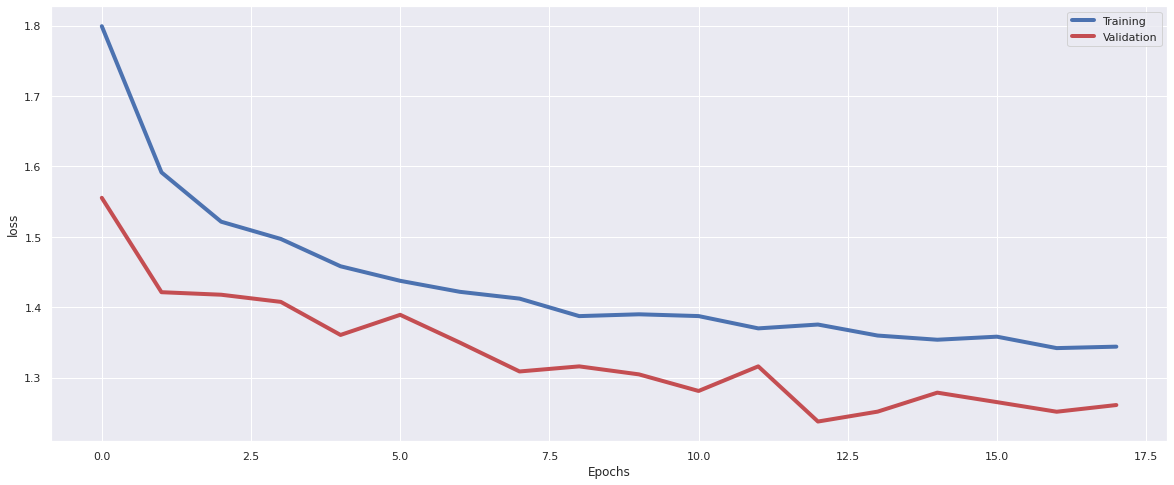

In [ ]:
plot_history(history,plot_type='loss')

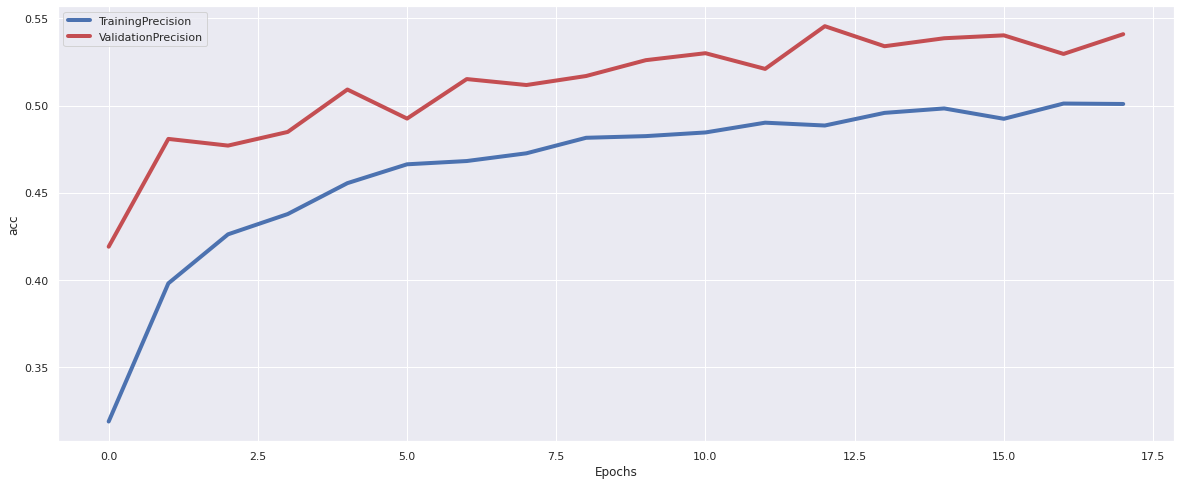

In [ ]:
plot_history(history,plot_type='acc')

In [ ]:
predictions = model.predict(X_test_resized_repeated)
print('Weighted F1-score is %.2f' %f1_score(y_test, convert_predictions(predictions), average='weighted'))

313/313 [==============================] - 5s 12ms/step
Weighted F1-score is 0.62


In [ ]:
print('Top-3accuracy %s' % top_k_accuracy_score(y_test, predictions, k=3))

Top-3accuracy 0.9201
